                                         Gas Consumption Anomaly Detection Project 

The Gas Consumption Anomaly Detection Project is all about the gas consumption monitoring over the time.  It records that how much gas different buildings are using evry hour. 

# Explanation of each part of Data 
Each row of the data tells us about the one timestamp which means the hourly reading and the data shows the gas usage hour by hour. 

So,  the row data shows the usage hour by hour.  

So, the column represents a specific meter hour by hour. 

Here, for the anomaly detection, we will be using the Unsupervised Machine Learning Models for the detection which are as: 

1. Isolation Forest : The isolation Forest is a Machine Learning Technique that helps in the detection of the anomalies. It detects  the  sudden spikes, and unusual values.  It detects the global anomalies. 

2. Local Outlier Factor :  It helps in detecting the local outlier factors and those anomalies. It detects the local anomalies. 

3. Robust Covariance Anomalies : The robust covariance anomalies help in detecting the statistical anomalies. 

In [2]:
# Importing the libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# Loading the data \
data = pd.read_csv("gas.csv") 
data 

,timestamp,Panther_lodging_Dean,Panther_lodging_Hattie,Panther_education_Teofila,Panther_lodging_Amos,Panther_education_Jerome,Panther_retail_Kristina,Panther_lodging_Sonja,Panther_education_Edna,Panther_education_Mohammad,...,Wolf_education_Cody,Wolf_office_Joana,Wolf_education_Roderick,Wolf_education_Loren,Wolf_education_Dorris,Wolf_retail_Toshia,Wolf_education_Katie,Wolf_education_Joaquin,Wolf_education_Tori,Wolf_education_Ursula
0,2016-01-01 00:00:00,89.3438,704.4419,NaN,99.6528,7486.8429,17.8688,0.0000,0.0000,4020.4731,...,0.0000,0.0,0.0,2634.5224,4083.5097,263.4522,0.0,2897.9746,0.0000,0.0
1,2016-01-01 01:00:00,89.3438,704.4419,NaN,0.0000,7486.8429,17.8688,518.1943,0.0000,3395.0662,...,395.1784,0.0,0.0,2766.2485,4083.5097,0.0000,0.0,2766.2485,0.0000,0.0
2,2016-01-01 02:00:00,89.3438,704.4419,NaN,99.6528,7847.6546,17.8688,0.0000,0.0000,4199.1609,...,0.0000,0.0,0.0,2634.5224,4083.5097,263.4522,0.0,3029.7008,0.0000,0.0
3,2016-01-01 03:00:00,89.3438,704.4419,NaN,0.0000,7667.2488,0.0000,0.0000,0.0000,3395.0662,...,0.0000,0.0,0.0,2634.5224,4083.5097,0.0000,0.0,2766.2485,0.0000,0.0
4,2016-01-01 04:00:00,107.2126,704.4419,NaN,99.6528,7306.4370,17.8688,0.0000,0.0000,3931.1295,...,0.0000,0.0,0.0,3029.7008,3820.0575,263.4522,0.0,2766.2485,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,35.7375,704.4419,0.0,99.6528,14071.6559,0.0000,558.0555,2465.5465,3608.1168,...,0.0000,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3293.1530,2634.5224,0.0
17540,2017-12-31 20:00:00,35.7375,1232.7733,0.0,0.0000,14161.8593,0.0000,219.2361,2465.5465,3427.7111,...,0.0000,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3029.7008,2634.5224,0.0
17541,2017-12-31 21:00:00,71.4751,704.4419,0.0,99.6528,14432.4681,0.0000,0.0000,2641.6571,3517.9139,...,0.0000,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3293.1530,2502.7963,0.0
17542,2017-12-31 22:00:00,53.6063,1056.6629,0.0,0.0000,14161.8593,0.0000,0.0000,2641.6571,3427.7111,...,263.4522,0.0,0.0,2897.9746,0.0000,0.0000,0.0,3424.8791,2502.7963,0.0


Now, comes the explanation part of the whole data, where the analysis has to be made for the further preprocessing. 

In [4]:
data.describe()  
# Here, is the description of the whole data 

,Panther_lodging_Dean,Panther_lodging_Hattie,Panther_education_Teofila,Panther_lodging_Amos,Panther_education_Jerome,Panther_retail_Kristina,Panther_lodging_Sonja,Panther_education_Edna,Panther_education_Mohammad,Panther_lodging_Ricky,...,Wolf_education_Cody,Wolf_office_Joana,Wolf_education_Roderick,Wolf_education_Loren,Wolf_education_Dorris,Wolf_retail_Toshia,Wolf_education_Katie,Wolf_education_Joaquin,Wolf_education_Tori,Wolf_education_Ursula
count,17488.000000,17488.000000,9790.000000,17486.000000,17208.000000,17488.000000,17488.000000,17488.000000,17488.000000,17489.000000,...,17452.000000,17540.000000,17353.000000,17542.000000,17541.000000,17543.000000,17542.000000,17541.000000,17541.000000,17541.000000
mean,184.584803,1984.015025,11.134429,59.135617,10276.124919,163.821281,425.510858,2056.320851,3638.102294,110.062557,...,313.155225,98.919250,130.503972,3400.143863,2944.609334,361.952110,2200.566607,2588.818897,7408.533509,1350.480295
std,174.624454,1084.735537,21.776425,63.800833,3055.032177,254.696739,442.925218,1716.529407,2984.835092,108.188823,...,612.159561,217.085409,267.145660,2800.852449,3261.236793,581.249477,4451.459136,1843.808492,9179.556709,2625.295730
min,17.868800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,89.343800,880.552300,0.000000,0.000000,7486.842900,0.000000,0.000000,704.441900,992.232100,0.000000,...,0.000000,0.000000,0.000000,1712.439600,0.000000,0.000000,0.000000,1053.809000,0.000000,0.000000
50%,107.212600,1937.215300,0.000000,99.652800,10914.553500,17.868800,318.888800,1761.104700,3216.378500,125.081400,...,0.000000,0.000000,0.000000,2634.522400,2107.617900,0.000000,0.000000,2502.796300,1844.165700,0.000000
75%,214.425200,2817.767500,19.930600,99.652800,12357.800500,321.637900,777.291500,2993.877900,5552.634325,160.818900,...,395.178400,0.000000,0.000000,3951.783600,4873.866400,658.630600,0.000000,4083.509700,18573.382900,1305.525800
max,1375.895300,10088.442400,119.583300,996.527500,30578.791700,1632.612300,2212.291200,20137.713400,87341.360500,839.832200,...,3293.153000,1119.672000,1225.053400,14885.051500,16992.669500,3293.153000,23974.153800,8035.293300,42942.715100,21783.639500


In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 178 entries, timestamp to Wolf_education_Ursula
dtypes: float64(177), object(1)
memory usage: 23.8+ MB


In [6]:
data.shape  
# here, as we can see that the shpe of the data gets printed.  

(17544, 178)

Now, we will be performing the further preprocessing for the anomaly detection of the data.

In [7]:
# Converting the timestamp column 

data['timestamp'] = pd.to_datetime(data["timestamp"])   
data 

,timestamp,Panther_lodging_Dean,Panther_lodging_Hattie,Panther_education_Teofila,Panther_lodging_Amos,Panther_education_Jerome,Panther_retail_Kristina,Panther_lodging_Sonja,Panther_education_Edna,Panther_education_Mohammad,...,Wolf_education_Cody,Wolf_office_Joana,Wolf_education_Roderick,Wolf_education_Loren,Wolf_education_Dorris,Wolf_retail_Toshia,Wolf_education_Katie,Wolf_education_Joaquin,Wolf_education_Tori,Wolf_education_Ursula
0,2016-01-01 00:00:00,89.3438,704.4419,NaN,99.6528,7486.8429,17.8688,0.0000,0.0000,4020.4731,...,0.0000,0.0,0.0,2634.5224,4083.5097,263.4522,0.0,2897.9746,0.0000,0.0
1,2016-01-01 01:00:00,89.3438,704.4419,NaN,0.0000,7486.8429,17.8688,518.1943,0.0000,3395.0662,...,395.1784,0.0,0.0,2766.2485,4083.5097,0.0000,0.0,2766.2485,0.0000,0.0
2,2016-01-01 02:00:00,89.3438,704.4419,NaN,99.6528,7847.6546,17.8688,0.0000,0.0000,4199.1609,...,0.0000,0.0,0.0,2634.5224,4083.5097,263.4522,0.0,3029.7008,0.0000,0.0
3,2016-01-01 03:00:00,89.3438,704.4419,NaN,0.0000,7667.2488,0.0000,0.0000,0.0000,3395.0662,...,0.0000,0.0,0.0,2634.5224,4083.5097,0.0000,0.0,2766.2485,0.0000,0.0
4,2016-01-01 04:00:00,107.2126,704.4419,NaN,99.6528,7306.4370,17.8688,0.0000,0.0000,3931.1295,...,0.0000,0.0,0.0,3029.7008,3820.0575,263.4522,0.0,2766.2485,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,35.7375,704.4419,0.0,99.6528,14071.6559,0.0000,558.0555,2465.5465,3608.1168,...,0.0000,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3293.1530,2634.5224,0.0
17540,2017-12-31 20:00:00,35.7375,1232.7733,0.0,0.0000,14161.8593,0.0000,219.2361,2465.5465,3427.7111,...,0.0000,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3029.7008,2634.5224,0.0
17541,2017-12-31 21:00:00,71.4751,704.4419,0.0,99.6528,14432.4681,0.0000,0.0000,2641.6571,3517.9139,...,0.0000,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3293.1530,2502.7963,0.0
17542,2017-12-31 22:00:00,53.6063,1056.6629,0.0,0.0000,14161.8593,0.0000,0.0000,2641.6571,3427.7111,...,263.4522,0.0,0.0,2897.9746,0.0000,0.0000,0.0,3424.8791,2502.7963,0.0


Now, we will be removing the timestamp column from the data, as its of no much use adn hence it will allow further preprocessing. 

In [8]:
x  = data.drop(["timestamp"], axis = 1) 
x 

,Panther_lodging_Dean,Panther_lodging_Hattie,Panther_education_Teofila,Panther_lodging_Amos,Panther_education_Jerome,Panther_retail_Kristina,Panther_lodging_Sonja,Panther_education_Edna,Panther_education_Mohammad,Panther_lodging_Ricky,...,Wolf_education_Cody,Wolf_office_Joana,Wolf_education_Roderick,Wolf_education_Loren,Wolf_education_Dorris,Wolf_retail_Toshia,Wolf_education_Katie,Wolf_education_Joaquin,Wolf_education_Tori,Wolf_education_Ursula
0,89.3438,704.4419,NaN,99.6528,7486.8429,17.8688,0.0000,0.0000,4020.4731,0.0000,...,0.0000,0.0,0.0,2634.5224,4083.5097,263.4522,0.0,2897.9746,0.0000,0.0
1,89.3438,704.4419,NaN,0.0000,7486.8429,17.8688,518.1943,0.0000,3395.0662,125.0814,...,395.1784,0.0,0.0,2766.2485,4083.5097,0.0000,0.0,2766.2485,0.0000,0.0
2,89.3438,704.4419,NaN,99.6528,7847.6546,17.8688,0.0000,0.0000,4199.1609,0.0000,...,0.0000,0.0,0.0,2634.5224,4083.5097,263.4522,0.0,3029.7008,0.0000,0.0
3,89.3438,704.4419,NaN,0.0000,7667.2488,0.0000,0.0000,0.0000,3395.0662,125.0814,...,0.0000,0.0,0.0,2634.5224,4083.5097,0.0000,0.0,2766.2485,0.0000,0.0
4,107.2126,704.4419,NaN,99.6528,7306.4370,17.8688,0.0000,0.0000,3931.1295,0.0000,...,0.0000,0.0,0.0,3029.7008,3820.0575,263.4522,0.0,2766.2485,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,35.7375,704.4419,0.0,99.6528,14071.6559,0.0000,558.0555,2465.5465,3608.1168,125.0814,...,0.0000,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3293.1530,2634.5224,0.0
17540,35.7375,1232.7733,0.0,0.0000,14161.8593,0.0000,219.2361,2465.5465,3427.7111,0.0000,...,0.0000,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3029.7008,2634.5224,0.0
17541,71.4751,704.4419,0.0,99.6528,14432.4681,0.0000,0.0000,2641.6571,3517.9139,125.0814,...,0.0000,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3293.1530,2502.7963,0.0
17542,53.6063,1056.6629,0.0,0.0000,14161.8593,0.0000,0.0000,2641.6571,3427.7111,35.7375,...,263.4522,0.0,0.0,2897.9746,0.0000,0.0000,0.0,3424.8791,2502.7963,0.0


In [9]:
x.isnull().sum() 

Panther_lodging_Dean           56
Panther_lodging_Hattie         56
Panther_education_Teofila    7754
Panther_lodging_Amos           58
Panther_education_Jerome      336
                             ... 
Wolf_retail_Toshia              1
Wolf_education_Katie            2
Wolf_education_Joaquin          3
Wolf_education_Tori             3
Wolf_education_Ursula           3
Length: 177, dtype: int64

The next step is converting the process of converting to the numeric data. Hence, the whole data gets converted to the numeric data and the missing values get filled. 

In [10]:
x = x.apply(pd.to_numeric, errors = "coerce") 
x = x.fillna(x.median()) 

x 

,Panther_lodging_Dean,Panther_lodging_Hattie,Panther_education_Teofila,Panther_lodging_Amos,Panther_education_Jerome,Panther_retail_Kristina,Panther_lodging_Sonja,Panther_education_Edna,Panther_education_Mohammad,Panther_lodging_Ricky,...,Wolf_education_Cody,Wolf_office_Joana,Wolf_education_Roderick,Wolf_education_Loren,Wolf_education_Dorris,Wolf_retail_Toshia,Wolf_education_Katie,Wolf_education_Joaquin,Wolf_education_Tori,Wolf_education_Ursula
0,89.3438,704.4419,0.0,99.6528,7486.8429,17.8688,0.0000,0.0000,4020.4731,0.0000,...,0.0000,0.0,0.0,2634.5224,4083.5097,263.4522,0.0,2897.9746,0.0000,0.0
1,89.3438,704.4419,0.0,0.0000,7486.8429,17.8688,518.1943,0.0000,3395.0662,125.0814,...,395.1784,0.0,0.0,2766.2485,4083.5097,0.0000,0.0,2766.2485,0.0000,0.0
2,89.3438,704.4419,0.0,99.6528,7847.6546,17.8688,0.0000,0.0000,4199.1609,0.0000,...,0.0000,0.0,0.0,2634.5224,4083.5097,263.4522,0.0,3029.7008,0.0000,0.0
3,89.3438,704.4419,0.0,0.0000,7667.2488,0.0000,0.0000,0.0000,3395.0662,125.0814,...,0.0000,0.0,0.0,2634.5224,4083.5097,0.0000,0.0,2766.2485,0.0000,0.0
4,107.2126,704.4419,0.0,99.6528,7306.4370,17.8688,0.0000,0.0000,3931.1295,0.0000,...,0.0000,0.0,0.0,3029.7008,3820.0575,263.4522,0.0,2766.2485,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,35.7375,704.4419,0.0,99.6528,14071.6559,0.0000,558.0555,2465.5465,3608.1168,125.0814,...,0.0000,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3293.1530,2634.5224,0.0
17540,35.7375,1232.7733,0.0,0.0000,14161.8593,0.0000,219.2361,2465.5465,3427.7111,0.0000,...,0.0000,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3029.7008,2634.5224,0.0
17541,71.4751,704.4419,0.0,99.6528,14432.4681,0.0000,0.0000,2641.6571,3517.9139,125.0814,...,0.0000,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3293.1530,2502.7963,0.0
17542,53.6063,1056.6629,0.0,0.0000,14161.8593,0.0000,0.0000,2641.6571,3427.7111,35.7375,...,263.4522,0.0,0.0,2897.9746,0.0000,0.0000,0.0,3424.8791,2502.7963,0.0


In [11]:
# Now, we apply the standard scaling feature  
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()   
scaled_data = sc.fit_transform(x) 

scaled_data = np.nan_to_num(scaled_data) 

# Model Training 
Now, we will be applying the model trainning for the further pre processing 

In [12]:
from sklearn.ensemble import IsolationForest 

iso_model  = IsolationForest(contamination = 0.02, random_state = 42) 

iso_model 

,n_estimators,100
,max_samples,'auto'
,contamination,0.02
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [13]:
iso_pred = iso_model.fit_predict(scaled_data) 
iso_pred = np.where(iso_pred == -1,1,0) 

iso_pred  

# Here the prediction of the anomalies have been made 

array([0, 0, 0, ..., 0, 0, 0], shape=(17544,))

In [14]:
# now, here we will be aplying the Local otlier factor to predict the local anomalies 

from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(n_neighbors = 20, contamination = 0.02) 

lof_model 

,n_neighbors,20
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,contamination,0.02
,novelty,False
,n_jobs,None


In [15]:
lof_pred = lof_model.fit_predict(scaled_data) 
lof_pred = np.where(lof_pred == -1,1,0) 

lof_pred 

array([1, 1, 1, ..., 0, 0, 0], shape=(17544,))

Here, 1 represnts anomaly and 0 represents normal 

In [16]:
from sklearn.covariance import EllipticEnvelope 

rc = EllipticEnvelope(contamination = 0.02, random_state = 42) 
rc 

,store_precision,True
,assume_centered,False
,support_fraction,None
,contamination,0.02
,random_state,42


In [17]:
rc_pred = rc.fit_predict(scaled_data) 
rc_pred = np.where(rc_pred == -1,1,0) 

rc_pred  

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\covariance\_robust_covariance.py:753: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], shape=(17544,))

Here, the anomalies model training has been done and now the results combining has to be doen for the further preprocessing. 

# Combining Reults 

In [18]:
results = pd.DataFrame({
    "IsolationForest" : iso_pred, 
    "LOF" : lof_pred, 
    "Robust Covariance" : rc_pred
}) 

results["Final_Anomaly"] = (results.sum(axis = 1) >= 2).astype(int)

results 

,IsolationForest,LOF,Robust Covariance,Final_Anomaly
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
17539,0,0,0,0
17540,0,0,0,0
17541,0,0,0,0
17542,0,0,0,0


In [19]:
data_result = data.copy() 

data_result["Final_Anomaly"] = results["Final_Anomaly"] 

data_result 

,timestamp,Panther_lodging_Dean,Panther_lodging_Hattie,Panther_education_Teofila,Panther_lodging_Amos,Panther_education_Jerome,Panther_retail_Kristina,Panther_lodging_Sonja,Panther_education_Edna,Panther_education_Mohammad,...,Wolf_office_Joana,Wolf_education_Roderick,Wolf_education_Loren,Wolf_education_Dorris,Wolf_retail_Toshia,Wolf_education_Katie,Wolf_education_Joaquin,Wolf_education_Tori,Wolf_education_Ursula,Final_Anomaly
0,2016-01-01 00:00:00,89.3438,704.4419,NaN,99.6528,7486.8429,17.8688,0.0000,0.0000,4020.4731,...,0.0,0.0,2634.5224,4083.5097,263.4522,0.0,2897.9746,0.0000,0.0,0
1,2016-01-01 01:00:00,89.3438,704.4419,NaN,0.0000,7486.8429,17.8688,518.1943,0.0000,3395.0662,...,0.0,0.0,2766.2485,4083.5097,0.0000,0.0,2766.2485,0.0000,0.0,0
2,2016-01-01 02:00:00,89.3438,704.4419,NaN,99.6528,7847.6546,17.8688,0.0000,0.0000,4199.1609,...,0.0,0.0,2634.5224,4083.5097,263.4522,0.0,3029.7008,0.0000,0.0,0
3,2016-01-01 03:00:00,89.3438,704.4419,NaN,0.0000,7667.2488,0.0000,0.0000,0.0000,3395.0662,...,0.0,0.0,2634.5224,4083.5097,0.0000,0.0,2766.2485,0.0000,0.0,0
4,2016-01-01 04:00:00,107.2126,704.4419,NaN,99.6528,7306.4370,17.8688,0.0000,0.0000,3931.1295,...,0.0,0.0,3029.7008,3820.0575,263.4522,0.0,2766.2485,0.0000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,35.7375,704.4419,0.0,99.6528,14071.6559,0.0000,558.0555,2465.5465,3608.1168,...,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3293.1530,2634.5224,0.0,0
17540,2017-12-31 20:00:00,35.7375,1232.7733,0.0,0.0000,14161.8593,0.0000,219.2361,2465.5465,3427.7111,...,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3029.7008,2634.5224,0.0,0
17541,2017-12-31 21:00:00,71.4751,704.4419,0.0,99.6528,14432.4681,0.0000,0.0000,2641.6571,3517.9139,...,0.0,0.0,3293.1530,0.0000,0.0000,0.0,3293.1530,2502.7963,0.0,0
17542,2017-12-31 22:00:00,53.6063,1056.6629,0.0,0.0000,14161.8593,0.0000,0.0000,2641.6571,3427.7111,...,0.0,0.0,2897.9746,0.0000,0.0000,0.0,3424.8791,2502.7963,0.0,0


Here, in the above code, we can see that the final anomaly column gets aligned and formed together to the whole dataset. 

In [20]:
# Now, we will be knowing the anomaly counts, to see that, how many anomalies will be there 

print("\nAnomaly Counts: ") 
print(results["Final_Anomaly"].value_counts())  

# From the above data, we can infer that there are about 145 anomalies in the whole data. 



Anomaly Counts: 
Final_Anomaly
0    17399
1      145
Name: count, dtype: int64


Now, we will be plotting the line graph to see the anomalies in the whole data and visualize them properly. 

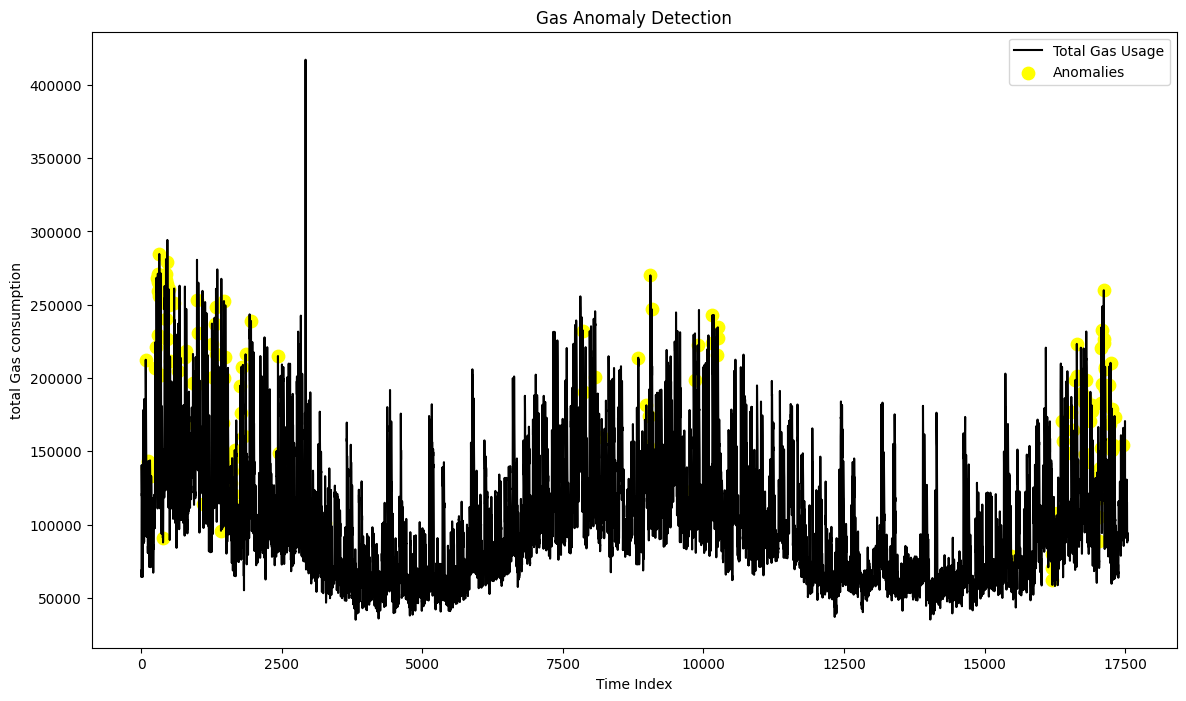

In [21]:
total_usage = x.sum(axis = 1) 
plt.figure(figsize = (14,8)) 

plt.plot(total_usage, label = "Total Gas Usage", color = "black") 

anomalies = results["Final_Anomaly"] == 1  

plt.scatter(np.where(anomalies)[0], 
            total_usage[anomalies],
            color = "yellow", 
            s = 80, 
            label = "Anomalies") 

plt.title("Gas Anomaly Detection") 
plt.xlabel("Time Index") 
plt.ylabel("total Gas consumption") 

plt.legend() 
plt.show() 



# Graph Explanation 
Here, as we can see that the scatter plot is plotted for plotting the Gas Consumption Time Series Anomaly Detection. This gramph bascially tells, where something unusual happended.  

The black line basically explains the total gas consumption. It basically tells that how: 
1. Gas Energy was used at each time 
2. The normal pattern of consumption 
3. Peaks and drops in consumption   

The yellow dots detects the anomalies. The points are normalyy where; 
1. usage is normalyy high or low 
2. Patterns suddenly change 


In [22]:
data_result.to_csv("gas_anomaly_results.csv", index = False) 

print("\n✅ DONE! Results saved.") 



✅ DONE! Results saved.


In [23]:
results.to_csv("Gas_Anomaly_Model_Results.csv", index = False)  

print("\n✅ DONE! Results saved.") 


✅ DONE! Results saved.
